<h2 id="ref1">REST APIs</h2>


<p>Rest API’s function by sending a <b>request</b>, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Golden State Warriors lost  by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication </p>


It's quite simple to use the nba api to make a request for a specific team. We don't require a JSON, all we require is an id. This information is stored locally in the API. We import the module `teams`

In [1]:
!pip3 install nba_api

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import pandas as pd

The method <code>get_teams()</code> returns a list of dictionaries.

In [3]:
nba_teams = teams.get_teams()

In [4]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys, the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.


In [5]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict    

In [6]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


Will use the team's nickname to find the unique id, we can see the row that contains the <strong>warriors</strong> by using the column nickname as follows:


In [7]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [8]:
id_warriors=df_warriors[['id']].iloc[0][0]
id_warriors

1610612744

The function "League Game Finder " will make an API call, it's in the module <code>stats.endpoints</code>


In [9]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.\
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>gamefinder</code>.


In [10]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [ ]:
gamefinder.get_json()

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column <code>MATCHUP</code> has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors. <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.


In [12]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612744,GSW,Golden State Warriors,1322200002,2022-07-02,GSW vs. SAC,L,240,68,...,0.538,6.0,29.0,35.0,9,9,1,19,15,-18.0
1,42021,1610612744,GSW,Golden State Warriors,0042100406,2022-06-16,GSW @ BOS,W,241,103,...,1.000,15.0,29.0,44.0,27,13,7,15,20,13.0
2,42021,1610612744,GSW,Golden State Warriors,0042100405,2022-06-13,GSW vs. BOS,W,240,104,...,0.867,4.0,35.0,39.0,23,9,2,6,28,10.0
3,42021,1610612744,GSW,Golden State Warriors,0042100404,2022-06-10,GSW @ BOS,W,241,107,...,0.800,16.0,39.0,55.0,20,10,5,16,21,10.0
4,42021,1610612744,GSW,Golden State Warriors,0042100403,2022-06-08,GSW @ BOS,L,237,100,...,0.867,6.0,25.0,31.0,22,7,5,16,23,-16.0


We can create two dataframes, one for the games that the Warriors faced the raptors at home, and the second for away games.


In [13]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

In [14]:
games_home

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
88,22021,1610612744,GSW,Golden State Warriors,0022100252,2021-11-21,GSW vs. TOR,W,241,119,...,0.792,8.0,39.0,47.0,31,5,7,16,18,15.0
113,22021,1610612744,GSW,Golden State Warriors,1522100027,2021-08-11,GSW vs. TOR,W,200,90,...,0.680,12.0,25.0,37.0,18,10,5,14,23,6.0
181,22020,1610612744,GSW,Golden State Warriors,0022000148,2021-01-10,GSW vs. TOR,W,240,106,...,0.895,12.0,39.0,51.0,30,2,10,15,18,1.0
196,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
267,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8,3,20,25,10.0
272,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9,6,16,23,-4.0
274,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8.0,34.0,42.0,26,6,6,17,23,-13.0
275,42018,1610612744,GSW,Golden State Warriors,0041800403,2019-06-05,GSW vs. TOR,L,241,109,...,0.833,13.0,28.0,41.0,25,8,3,14,21,-14.0
347,22018,1610612744,GSW,Golden State Warriors,0021800415,2018-12-12,GSW vs. TOR,L,239,93,...,0.692,5.0,35.0,40.0,28,5,11,19,18,-20.0
487,22017,1610612744,GSW,Golden State Warriors,0021700063,2017-10-25,GSW vs. TOR,W,241,117,...,0.864,6.0,31.0,37.0,32,10,7,17,15,5.0


In [15]:
games_away

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
75,22021,1610612744,GSW,Golden State Warriors,0022100443,2021-12-18,GSW @ TOR,L,240,100,...,0.714,11.0,36.0,47.0,26,5,5,20,21,-19.0
142,22020,1610612744,GSW,Golden State Warriors,0022000737,2021-04-02,GSW @ TOR,L,240,77,...,0.778,7.0,31.0,38.0,19,5,4,21,18,-53.0
273,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5,7,15,22,1.0
276,42018,1610612744,GSW,Golden State Warriors,0041800402,2019-06-02,GSW @ TOR,W,240,109,...,0.870,6.0,36.0,42.0,34,7,5,15,26,5.0
277,42018,1610612744,GSW,Golden State Warriors,0041800401,2019-05-30,GSW @ TOR,L,239,109,...,0.935,9.0,29.0,38.0,29,6,2,16,27,-9.0
353,22018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6,5,14,22,-3.0
448,22017,1610612744,GSW,Golden State Warriors,0021700631,2018-01-13,GSW @ TOR,W,239,127,...,0.857,3.0,27.0,30.0,28,4,3,6,20,2.0
590,22016,1610612744,GSW,Golden State Warriors,0021600165,2016-11-16,GSW @ TOR,W,240,127,...,0.929,7.0,28.0,35.0,33,9,7,12,25,6.0
607,12016,1610612744,GSW,Golden State Warriors,0011600001,2016-10-01,GSW @ TOR,L,241,93,...,0.625,9.0,33.0,42.0,19,15,7,21,24,-4.0
609,22016,1610612744,GSW,Golden State Warriors,1521600051,2016-07-14,GSW @ TOR,L,198,69,...,0.750,14.0,29.0,43.0,16,9,3,17,25,-6.0


We can calculate the mean for the column <code>PLUS_MINUS</code> for the dataframes <code>games_home</code> and <code> games_away</code>:


In [16]:
games_home.mean()['PLUS_MINUS']

/var/folders/cs/s_mqx4bd4px04nndhj8s6js80000gn/T/ipykernel_6443/2928503647.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  games_home.mean()['PLUS_MINUS']


3.7

In [17]:
games_away.mean()['PLUS_MINUS']

/var/folders/cs/s_mqx4bd4px04nndhj8s6js80000gn/T/ipykernel_6443/1559783549.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  games_away.mean()['PLUS_MINUS']


-2.966666666666667

We can plot out the <code>PLUS MINUS</code> column for the dataframes <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.


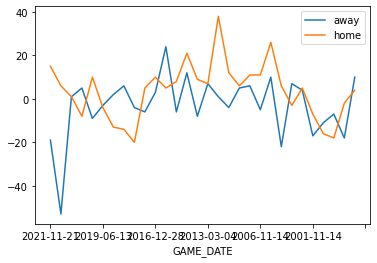

In [18]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()